<a href="https://colab.research.google.com/github/ptavares96/airbnb_analysis/blob/main/airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Airbnb Data - San Francisco

Founded in 2008, [Airbnb](https://www.airbnb.com.br/) revolutionized the way people find accommodations during their travels. Present in more than 190 countries, the platform offers a variety of options, allowing users to escape the traditional standards of hotel accommodation. By opting for houses and apartments, travelers can customize their experience based on travel time, location, and number of people, often finding more economical options than conventional hotel rooms.

With the aim of studying information extraction from company data, this project presents an analysis of Airbnb data for the city of San Francisco, California.

## 0. Introduction
In this data analysis example, I will explore Airbnb data related to the city of San Francisco, seeking to understand the availability of rental homes and gather relevant information for our analysis.

Located in northern California, on the west coast of the United States, San Francisco is a historic city with a population of 873,000 inhabitants. Founded in 1776 by Franciscan priests, the city gained prominence from 1848 when the discovery of gold in the region led to a significant increase in population, jumping from 1,000 to 25,000 inhabitants in just one year.

Despite facing challenges such as the 1906 earthquake, which destroyed part of the city, San Francisco quickly recovered, rebuilding itself and, nine years after the disaster, hosting the Panama-Pacific International Exposition.

San Francisco is an attractive destination for international travelers, having received around 10.2 million tourists in 2022. However, this number represents a significant drop compared to the approximately 26 million tourists the city received in 2019. This decrease is attributed to travel restrictions implemented due to the Coronavirus pandemic.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import usage packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="white")

## 1. Data Information and Data Cleaning
The data was obtained from the [Inside Airbnb](http://insideairbnb.com/get-the-data/) portal. This portal provides access to various datasets from various cities, provided directly by the Airbnb company itself.

Inside Airbnb is a platform dedicated to providing detailed information about accommodation listings, allowing for a deeper analysis of rental market patterns and trends. The provided datasets include a variety of relevant information, such as the location of residences, property characteristics, prices, availability, among others.


In [5]:
# import data
df = pd.read_csv("/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listings.csv")

Before starting the analysis, let's verify if everything is correct with the data importation by observing the first 5 entries.






In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,NaN,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application
1,474107,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,2318089,Inés,NaN,Excelsior,37.72369,-122.42865,Private room,79,2,149,2023-11-14,1.92,1,196,20,STR-0007772
2,487019,Rental unit in San Francisco · ★4.53 · 3 bedro...,2410550,Cecile,NaN,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,2023-07-18,0.26,1,202,7,STR-0001599
3,487499,Rental unit in San Francisco · ★4.78 · 1 bedro...,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,196,2023-11-04,1.41,1,149,4,NaN
4,1163946,Condo in San Francisco · 2 bedrooms · 2 beds ·...,1918239,Jen,NaN,Mission,37.76111,-122.42082,Entire home/apt,70,30,2,2016-10-07,0.02,1,0,0,NaN


In [7]:
def data_info(df):
    print('Number of entries (rows): ', df.shape[0])
    print('\nNumber of variables (columns): ', df.shape[1])
    print("\nFeature names:\n{}".format(df.columns.values))
    print("\nTypes of variables (by column):\n{}".format(df.dtypes))
    print("\nUnique values (by column):\n{}".format(df.nunique().sort_values(ascending=False)))
    print("\nMissing data (total):\t{}".format(df.isnull().sum().max()))
    print("\nPercentage of missing values (by column):\n{}".format((df.isnull().sum() * 100/ df.shape[0]).sort_values(ascending=False)))

In [8]:
data_info(df)

Number of entries (rows):  8056

Number of variables (columns):  18

Feature names:
['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365'
 'number_of_reviews_ltm' 'license']

Types of variables (by column):
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_l

The Airbnb dataset for the city of San Francisco consists of **8056 entries** (rows) and **18 variables** (columns).

Predominantly, the dataset consists of variables of integer type (int64) and objects (object). Some columns, such as `neighbourhood_group`, `reviews_per_month`, `last_review`, and `license`, contain float64 data types.

Some columns have a considerable number of unique values, such as `id` (8056), `longitude` (5898), `latitude` (5820). In the case of the `id` variable, it indicates that each data is unique, while the high number of unique values in longitude and latitude is due to them being location variables. The dataset presents missing data in various columns.

The `neighbourhood_group` column is completely missing, and the `license` has a 36.80% absence rate. Other columns, such as `reviews_per_month` and `last_review`, also have a considerable proportion of missing values, reaching 23.39%.

**Variable Dictionary**

* id: unique identification for the listing
* name: name of the listing
* host_id: unique identifier for the property owner
* host_name: name of the owner
* neighbourhood_group: municipality to which the property belongs, geolocated by latitude and longitude coordinates
* neighbourhood: property's neighborhood
* latitude: geographical latitude coordinate of the property
* longitude: geographical longitude coordinate of the property
* room_type: type of room offered for rent
* price: rental price per night
* minimum_nights: minimum number of nights to rent the property
* number_of_reviews: number of reviews the property has
* last_review: date of the last review
* reviews_per_month: number of reviews per month
* calculated_host_listings_count: number of properties owned by the same owner in the same city/region
* availability_365: number of days available for rent in the next 365 days
* number_of_reviews_ltm: number of reviews in the last 12 months
* license: property registration number

In [9]:
# statistics
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.056000e+03,8.056000e+03,0.0,8056.000000,8056.000000,8056.000000,8056.000000,8056.000000,6172.000000,8056.000000,8056.000000,8056.000000
mean,3.092664e+17,1.478669e+08,NaN,37.769002,-122.430103,392.071003,20.613704,47.044315,1.308681,23.931231,177.644613,9.261544
std,4.133426e+17,1.780674e+08,NaN,0.023135,0.027098,2182.756993,48.643332,98.818437,1.839152,54.417781,136.047253,19.334341
min,9.580000e+02,1.169000e+03,NaN,37.708480,-122.512460,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.171546e+07,6.990632e+06,NaN,37.753880,-122.442383,95.000000,2.000000,1.000000,0.190000,1.000000,33.000000,0.000000
50%,4.500022e+07,5.578278e+07,NaN,37.774207,-122.422381,145.000000,3.000000,7.000000,0.560000,3.000000,176.000000,1.000000
75%,7.630646e+17,2.635022e+08,NaN,37.787865,-122.411020,249.000000,30.000000,44.000000,1.810000,12.000000,318.000000,8.000000
max,1.037699e+18,5.490278e+08,NaN,37.809810,-122.358480,50000.000000,1125.000000,1134.000000,35.880000,249.000000,365.000000,426.000000


The variable `price`, which represents the rental price per night in dollars, exhibits an average of around \$228.00, with 75% of the values below \$232.00. However, the maximum price of \$25,000.00 and the considerable standard deviation of \$671.91 are noteworthy. This distribution suggests the presence of outliers that may impact the interpretation of the results.

Additionally, the variable `minimum_nights` reveals that the average minimum nights for rental is approximately 24 nights, with 75% of the values below 30 nights. However, the maximum recorded value is 1,125 nights, a level outside the typical Airbnb rental standard. This high value is notable and may be considered a possible outlier, requiring a more in-depth analysis to understand its origin and impact on the study's conclusions.

Regarding the reviews, the average number of reviews per month (`reviews_per_month`) is approximately 2.06, with a maximum value of 162, considered high compared to the average, and a 75% value of 2.13, suggesting the presence of outliers. The same applies to the `number_of_reviews` variable, with an average of 44 and 75% of the data below 45. However, it presents a maximum value of 877 and a standard deviation of 85.49, indicating the possible existence of outliers that deserve further investigation.

The variable `calculated_host_listings_count` reveals an average of 14 properties per user, but with a deviation of approximately 32 and a maximum value of 154. As for `number_of_reviews_ltm`, there is a maximum of 435, with an average of 6.89 and a standard deviation of 16.51. These data also point to the presence of outlier values that may influence the analyses, highlighting the importance of considering these cases when interpreting the study's results.

I will use the IQR method to identify these outlier values.

In [10]:
def outlier_boundary(dataset, column_list):
    for column in column_list:
        if column in dataset:
            des = dataset[column].describe()
            Q1 = des["25%"]
            Q3 = des["75%"]
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            print(f"The upper boundary for the column {column} is {upper} and the lower boundary is {lower}.")

In [11]:
colunas = ['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm']

outlier_boundary(df, colunas)

The upper boundary for the column price is 480.0 and the lower boundary is -136.0.
The upper boundary for the column minimum_nights is 72.0 and the lower boundary is -40.0.
The upper boundary for the column reviews_per_month is 4.24 and the lower boundary is -2.24.
The upper boundary for the column number_of_reviews is 108.5 and the lower boundary is -63.5.
The upper boundary for the column calculated_host_listings_count is 28.5 and the lower boundary is -15.5.
The upper boundary for the column number_of_reviews_ltm is 20.0 and the lower boundary is -12.0.


Now that we have identified these outlier values, I can proceed to handle them. To avoid affecting other data and not introduce any bias, I will simply replace these values with missing values.

In [12]:
import numpy as np

df_clean = df.copy()

In [13]:
df_clean['price'] = np.where((df_clean['price'] < -136) | (df_clean['price'] > 480), np.nan, df_clean['price'])
df_clean['minimum_nights'] = np.where((df_clean['minimum_nights'] < -40) | (df_clean['minimum_nights'] > 72), np.nan, df_clean['minimum_nights'])
df_clean['number_of_reviews'] = np.where((df_clean['number_of_reviews'] < -63.5) | (df_clean['number_of_reviews'] > 108.5), np.nan, df_clean['number_of_reviews'])
df_clean['reviews_per_month'] = np.where((df_clean['reviews_per_month'] < -2.24) | (df_clean['reviews_per_month'] > 4.24), np.nan, df_clean['reviews_per_month'])
df_clean['calculated_host_listings_count'] = np.where((df_clean['calculated_host_listings_count'] < -15.5) | (df_clean['calculated_host_listings_count'] > 28.5), np.nan, df_clean['calculated_host_listings_count'])
df_clean['number_of_reviews_ltm'] = np.where((df_clean['number_of_reviews_ltm'] < -12.0) | (df_clean['number_of_reviews_ltm'] > 20), np.nan, df_clean['number_of_reviews_ltm'])

In [14]:
# statistis of the clean data
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.056000e+03,8.056000e+03,0.0,8056.000000,8056.000000,7383.000000,7863.000000,7016.000000,5746.000000,6634.000000,8056.000000,6816.000000
mean,3.092664e+17,1.478669e+08,NaN,37.769002,-122.430103,161.218069,14.248887,16.353050,0.952652,4.290021,177.644613,2.741491
std,4.133426e+17,1.780674e+08,NaN,0.023135,0.027098,94.970172,14.395581,25.011109,1.065095,5.720828,136.047253,4.496685
min,9.580000e+02,1.169000e+03,NaN,37.708480,-122.512460,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.171546e+07,6.990632e+06,NaN,37.753880,-122.442383,90.000000,2.000000,0.000000,0.180000,1.000000,33.000000,0.000000
50%,4.500022e+07,5.578278e+07,NaN,37.774207,-122.422381,135.000000,3.000000,4.000000,0.460000,2.000000,176.000000,1.000000
75%,7.630646e+17,2.635022e+08,NaN,37.787865,-122.411020,208.000000,30.000000,21.000000,1.400000,5.000000,318.000000,3.000000
max,1.037699e+18,5.490278e+08,NaN,37.809810,-122.358480,480.000000,70.000000,108.000000,4.240000,28.000000,365.000000,20.000000


In [15]:
# Saving the clean data

df_clean.to_csv(r'/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listing_clean.csv', index=False)

df_clean = pd.read_csv("/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listing_clean.csv")

After cleaning the outliers, it is observed that the characteristics of the variables have been significantly adjusted. The average price (`price`) has reduced to \$161.22, with a standard deviation of \$94.97.

The minimum number of nights (`minimum_nights`) now has an average of 14.25, with a standard deviation of 14.40. The reduction in data dispersion suggests that most properties require a more reasonable number of minimum nights for rental, eliminating extreme values that previously distorted the average.

The variable `number_of_reviews` now has an average of 16.35, with a standard deviation of 25.01.

The average reviews per month (`reviews_per_month`) has been adjusted to 0.95, with a standard deviation of 1.07. This more homogeneous result suggests a more stable distribution of monthly review frequency.

The average number of properties listed per user (`calculated_host_listings_count`) has been adjusted to 4.29, with a standard deviation of 5.72. This adjustment indicates a more concentrated distribution compared to the previous data.

Finally, the average number of reviews in the last 12 months (`number_of_reviews_ltm`) has been adjusted to 2.74, with a standard deviation of 4.50.

The cleaning process has allowed for a more centered distribution and less influenced by extreme values.

## 2. Univariate Analysis

In an initial data analysis approach, I find it interesting to formulate some specific questions to guide the investigation and direct the visualization of information through relevant graphs.

The univariate analysis phase focuses on evaluating a single variable, considering its distribution and proportion in the data. By understanding how a variable is distributed, trends, anomalies, and distinctive characteristics can be seen. This approach provides a detailed view of the data, enabling the appropriate choice of graphs that best represent the characteristics of the variable in question.

Some suggested questions:

* What is the distribution of rental prices per night?

* What are the most common types of rooms offered for rent? Is there a predominance in any type?

* How does the minimum number of nights for rent vary among properties?

* How are the reviews distributed?

* How is the distribution of the number of reviews per month?

* How is availability distributed throughout the year?

* What is the distribution of the number of properties owned by the same owner in the city?

* How are properties geographically distributed in the city? Is there any concentration in specific neighborhoods?

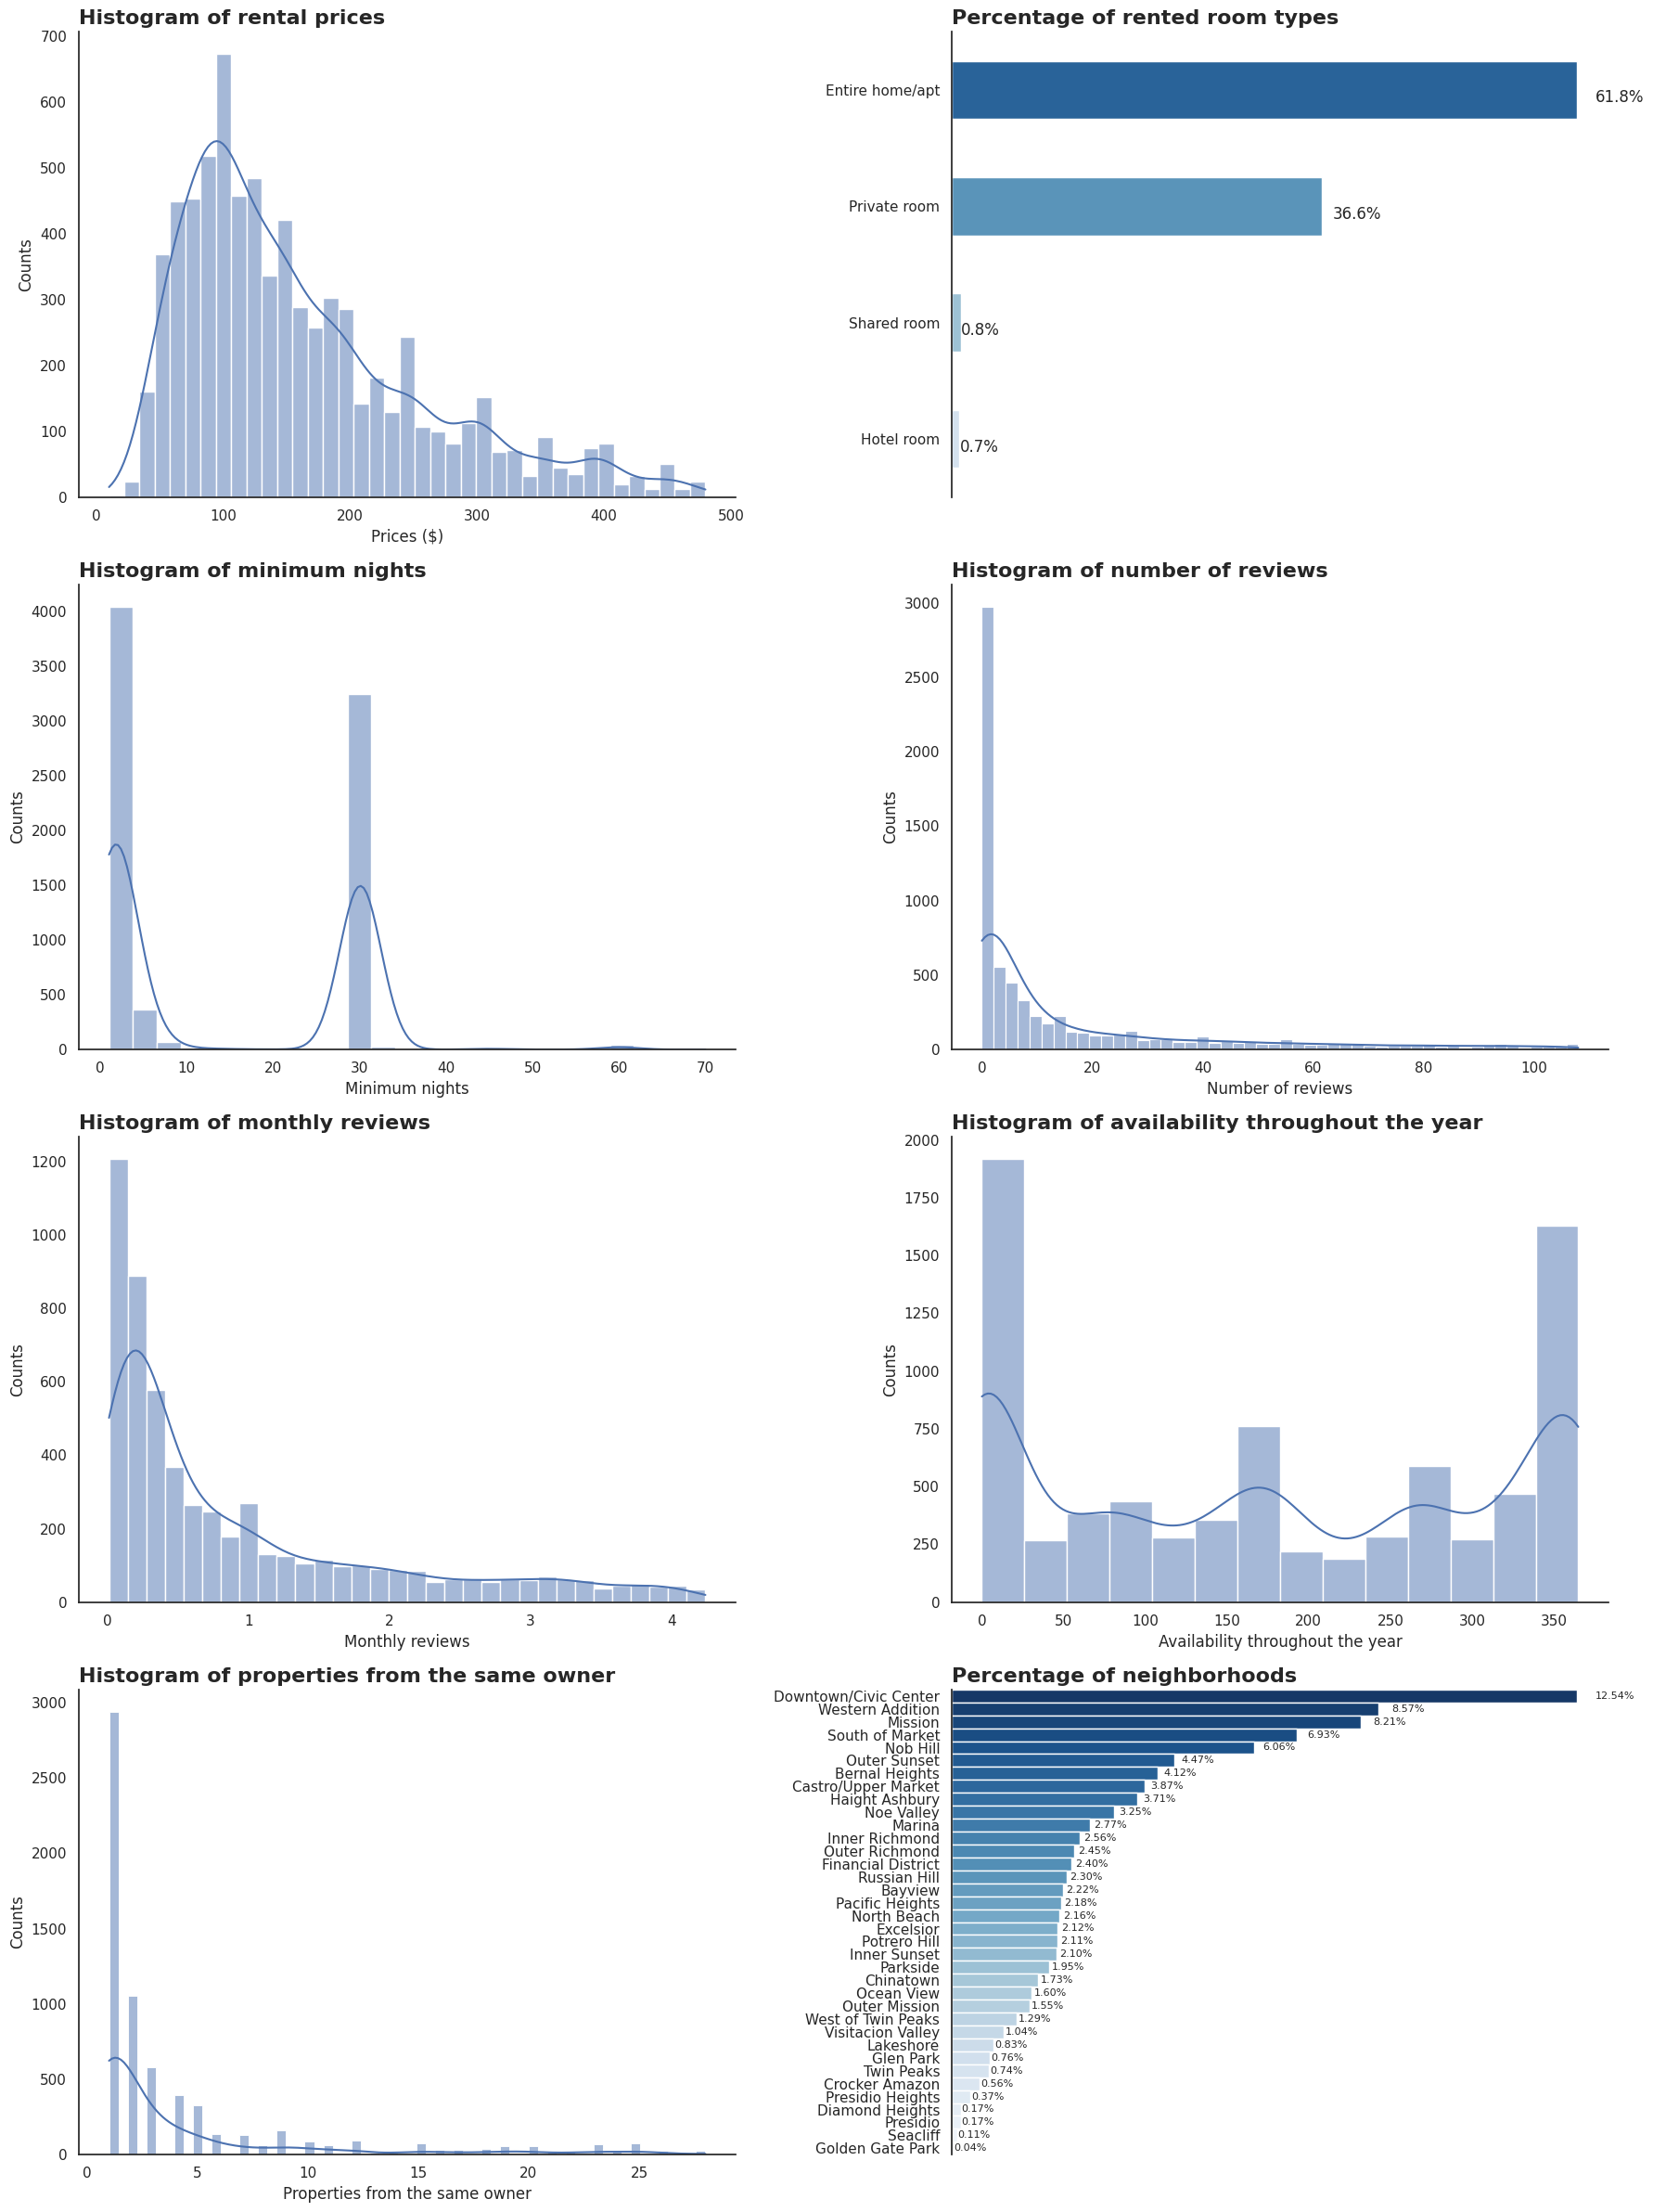

In [18]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18, 24))

# ax1
sns.histplot(x=df_clean['price'], data=df_clean, ax=ax1, palette="Blues_r", kde=True)
ax1.set_ylabel("Counts")
ax1.set_xlabel("Prices ($)")
ax1.set_title('Histogram of rental prices', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax1)

# ax2
sns.countplot(y=df_clean['room_type'], data=df_clean, palette="Blues_r", width=0.5, ax=ax2)
ax2.set_title('Percentage of rented room types', loc='left', fontsize=16, fontweight='bold')
ax2.set_xticklabels([])
ax2.set_ylabel(" ")
ax2.set_xlabel(" ")
sns.despine(bottom=True, ax=ax2)

total = len(df_clean['room_type'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() * 1.03
    y = p.get_y() + p.get_height() / 1.4
    ax2.annotate(percentage, (x, y), size=12)

# ax3
sns.histplot(x=df_clean['minimum_nights'], data=df_clean, ax=ax3, palette="Blues_r", kde=True)
ax3.set_ylabel("Counts")
ax3.set_xlabel("Minimum nights")
ax3.set_title('Histogram of minimum nights', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax3)

# ax4
sns.histplot(x=df_clean['number_of_reviews'], data=df_clean, ax=ax4, palette="Blues_r", kde=True)
ax4.set_ylabel("Counts")
ax4.set_xlabel("Number of reviews")
ax4.set_title('Histogram of number of reviews', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax4)

# ax5
sns.histplot(x=df_clean['reviews_per_month'], data=df_clean, ax=ax5, palette="Blues_r", kde=True)
ax5.set_ylabel("Counts")
ax5.set_xlabel("Monthly reviews")
ax5.set_title('Histogram of monthly reviews', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax5)

# ax6
sns.histplot(x=df_clean['availability_365'], data=df_clean, ax=ax6, palette="Blues_r", kde=True)
ax6.set_ylabel("Counts")
ax6.set_xlabel("Availability throughout the year")
ax6.set_title('Histogram of availability throughout the year', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax6)

# ax7
sns.histplot(x=df_clean['calculated_host_listings_count'], data=df_clean, ax=ax7, palette="Blues_r", kde=True)
ax7.set_ylabel("Counts")
ax7.set_xlabel("Properties from the same owner")
ax7.set_title('Histogram of properties from the same owner', loc='left', fontsize=16, fontweight='bold')
sns.despine(ax=ax7)

# ax8
order = df_clean['neighbourhood'].value_counts().index
sns.countplot(y=df_clean['neighbourhood'], data=df_clean, palette="Blues_r", order=order, width=1, ax=ax8)
ax8.set_title('Percentage of neighborhoods', loc='left', fontsize=16, fontweight='bold')
ax8.set_xticklabels([])
ax8.set_ylabel(" ")
ax8.set_xlabel(" ")
sns.despine(bottom=True, ax=ax8)

total = len(df_clean['neighbourhood'])
for p in ax8.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_width() * 1.03
    y = p.get_y() + p.get_height() / 1.4
    ax8.annotate(percentage, (x, y), size=8)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/univariate.png', dpi=300)
plt.show()

**Some conclusions about the graphs:**

- Rental values are concentrated between a minimum of \$10.00 and \$200.00. There is a large number of properties rented for values close to \$100.00.
- Houses/Apartments are the most rented property types, accounting for 61.8% of rentals. Hotel rooms are the least sought after, at 0.7%.
- The most sought-after rental periods are those ranging from 0 to 5 nights, as well as stays of 30 nights. There is diversity in tenants' needs, including both temporary and extended stays.
- The majority of reviews fall between 0 - 5.
- There are large availabilities of properties for 350 days and between 0 to 25 days.
- Most property owners only own one property. This may indicate a significant participation of individual owners on Airbnb.
- 12.54% of properties are in Downtown/Civic Center, followed by Western Addition with 8.57%. There are fewer properties (0.04%) in Golden Gate Park.

## 3. Multivariate Analysis

Possible questions to be asked:

- What is the relationship between price and room type?
- Does location (neighborhood) influence the number of reviews or the rental prices?
- The number of properties in each neighborhood?
- How do reviews affect rental prices?
- Do properties with more reviews per month tend to have higher prices?
- Is there a relationship between the minimum number of nights and availability throughout the year?

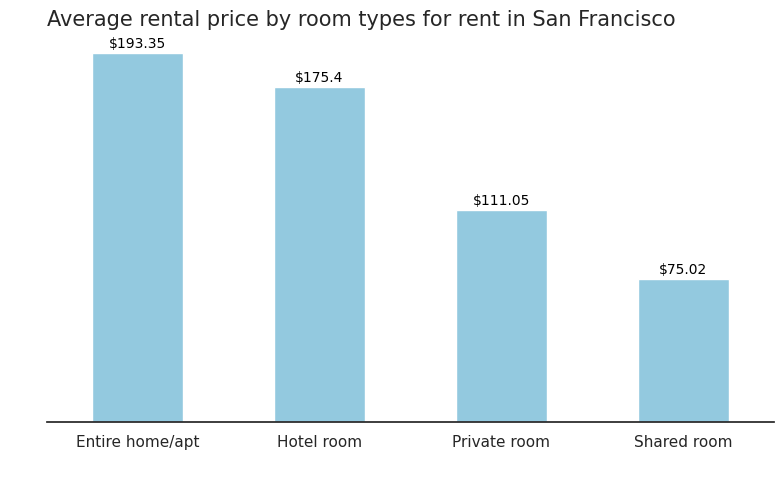

In [19]:
price_types_room = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x=price_types_room.index, y=price_types_room.values, color='skyblue', width=0.5)

for i, v in enumerate(price_types_room.values):
    ax.text(i, v + 1, f"${v}", color='black', ha='center', va='bottom', fontsize=10)

ax.set_title('Average rental price by room types for rent in San Francisco', loc='left', fontsize=15)
ax.set_xlabel(' ')
ax.set_yticklabels([])
ax.set_ylabel(' ')
sns.despine(left=True)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/mean_type_of_room.png', dpi=300)
plt.show()

In first place among the most expensive property types is houses/apartments with an average rental value of \$193.3. Private rooms cost on average \$175.4, being the second most expensive property. The cheapest of the properties are hotel rooms with an average rental value of \$75.02.

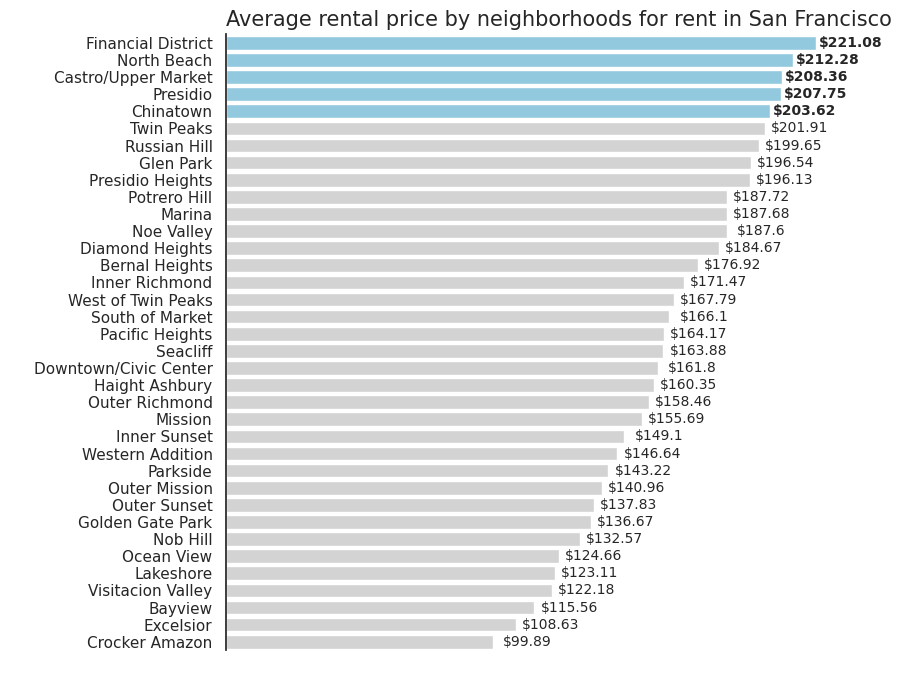

In [24]:
price_neighbourhood = round(df_clean.groupby('neighbourhood').price.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

colors = ['skyblue' if i < 5 else 'lightgrey' for i in range(len(price_neighbourhood))]

ax = sns.barplot(y=price_neighbourhood.index, x=price_neighbourhood.values, palette=colors)

for i, v in enumerate(price_neighbourhood.values):
    text_font = 'bold' if i < 5 else None
    ax.text(v + 13, i, f"${v}", fontweight=text_font , ha='center', va='center', fontsize=10)

ax.set_title('Average rental price by neighborhoods for rent in San Francisco', loc='left', fontsize=15)
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_xticklabels([])
ax.set_ylabel(' ')
sns.despine(bottom=True)


plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/price_for_neighb.png', dpi=300)
plt.show()

The five most expensive neighborhoods for rent are Financial District (\$221.08), North Beach (\$212.38), Castro/Upper Market (\$208.36), Presidio (\$207.75), and Chinatown (\$203.32).






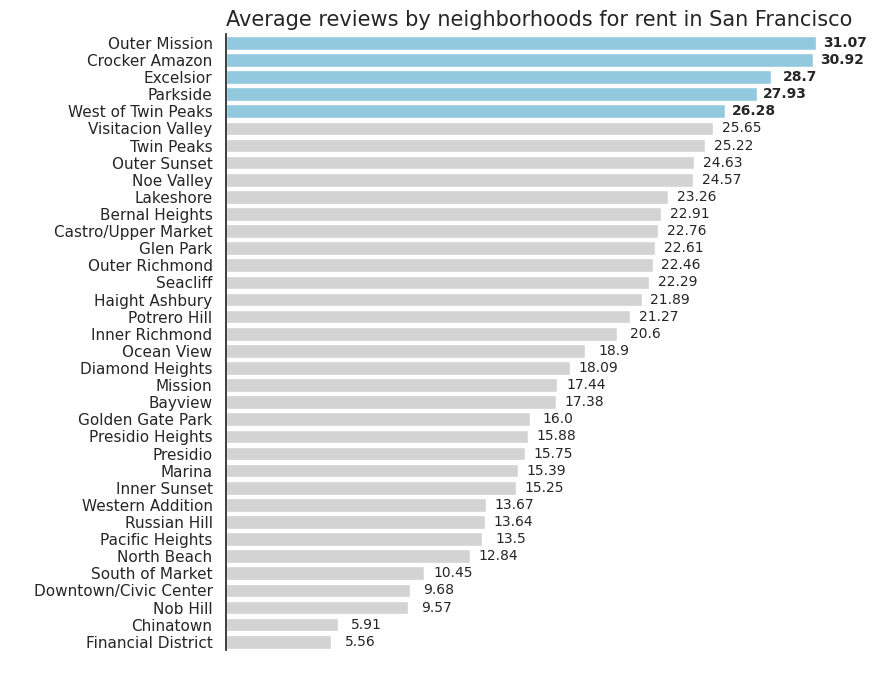

In [25]:
reviews_neighbourhood = round(df_clean.groupby('neighbourhood').number_of_reviews.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

colors = ['skyblue' if i < 5 else 'lightgrey' for i in range(len(reviews_neighbourhood))]

ax = sns.barplot(y=reviews_neighbourhood.index, x=reviews_neighbourhood.values, palette=colors)

for i, v in enumerate(reviews_neighbourhood.values):
    text_font = 'bold' if i < 5 else None
    ax.text(v + 1.5, i, f"{v}", fontweight=text_font , ha='center', va='center', fontsize=10)

ax.set_title('Average reviews by neighborhoods for rent in San Francisco', loc='left', fontsize=15)
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_xticklabels([])
ax.set_ylabel(' ')
sns.despine(bottom=True)

plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/reviews_for_neighb.png', dpi=300)
plt.show()

If we compare the above graph on reviews by neighborhood, we have an interesting situation where 2 of the neighborhoods out of the 5 most expensive, Financial District, have the lowest average reviews with 5.91 and 5.56 respectively. The top 5 neighborhoods with the highest reviews are Outer Mission, Crocker Amazon, Excelsior, and Parkside.






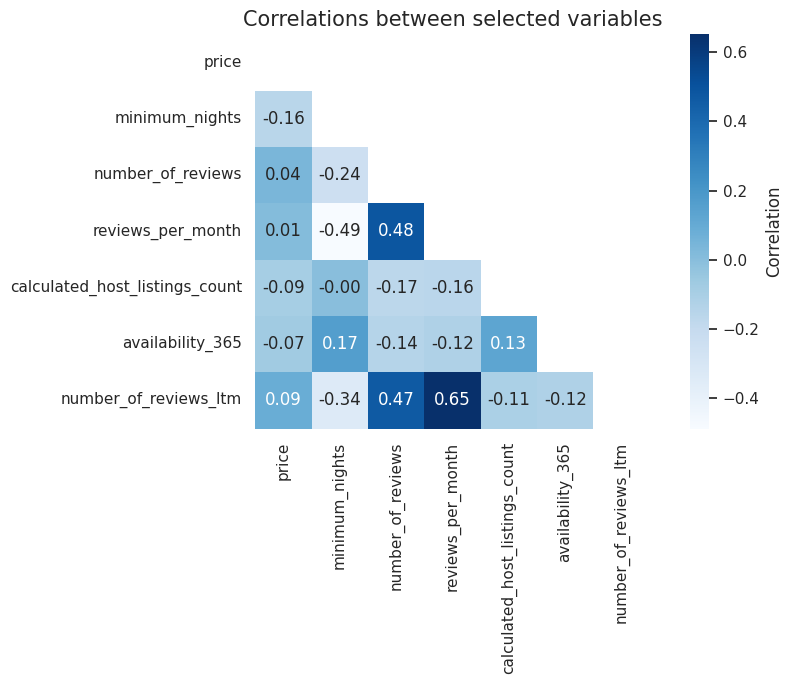

In [26]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_no_duplicates = corr.mask(mask)

# Plot a heatmap from the unique correlations
plt.figure(figsize=(10, 7))
sns.heatmap(corr_no_duplicates, fmt='.2f', square=True, annot=True, cmap="Blues", cbar_kws={'label': 'Correlation'})
plt.title('Correlations between selected variables', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/corr.png', dpi=300)
plt.show()




Conclusions about the correlations:

- The relationship between price and other variables is generally weak.
- The minimum number of nights has a negative relationship with availability and a moderate negative relationship with the number of long-term reviews.
- The number of reviews is strongly related to both the number of long-term reviews and the number of reviews per month.
- Availability throughout the year has a weak relationship with several variables, including price and number of long-term reviews.

## 4. Conclusions

This project aimed to conduct an analysis of Airbnb data for the city of San Francisco. Initially, it was necessary to clean up some variables, such as the `neighbourhood_group` variable, which had no entries. It was also necessary to clean outliers in the `price` and `minimum_nights` variables. This cleaning process is important as these variables can be considered important factors for choosing a particular location.

After that, to facilitate the analysis process, I formulated some questions to perform univariate and multivariate analysis.

Analyzing the graphs, we observed that the majority of rentals are concentrated in values around \$100, with a significant representation of houses/apartments (61.8%) and a preference for rental periods of 0 to 5 nights. The number of reviews predominates in the range of 0 to 5. Most owners have only one property, suggesting significant individual participation in Airbnb.

In the categorization of properties by average rental price, houses/apartments lead with \$193.3, followed by private rooms (\$175.4) and hotel rooms (\$75.02). The most expensive neighborhoods include Financial District, North Beach, Castro/Upper Market, Presidio, and Chinatown, while Outer Mission, Crocker Amazon, Excelsior, and Parkside are the best rated.

Correlation analyses reveal that the relationship between price and other variables is generally weak. The minimum number of nights shows a negative relationship with availability and a moderate negative relationship with the number of long-term reviews. The number of reviews is strongly related to both long-term reviews and the number of reviews per month. Availability throughout the year has weak relationships with several variables, including price and the number of long-term reviews.

